# 패키지 불러오기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# seaborn 내에 있는 iris 내장 데이터 불러오기

데이터셋을 불러오는 방법은 크게 3가지<br>
1. 크롤링&웹 스크래핑을 통해 불러오기(네이버, 인스타, 구글 등)
2. 만들어져있는 데이터셋 불러오기(csv, xlsx, db 등)
3. 패키지 내 내장 데이터 불러오기

이번에는 패키지 내 내장 데이터셋을 불러와서 진행
seaborn 패키지 내에 load_dataset을 활용하면 튜토리얼 데이터셋을 불러올 수 있다.


#### 데이터 설명
iris(붓꽃)데이터는 꽃잎의 각 부분 너비와 길이 등을 측정한 데이터이다.<br>

각 column별 설명<br>
sepal_length : 꽃받침의 길이 정보<br>
sepal_width : 꽃받침의 너비 정보<br>
petal_length : 꽃잎의 길이 정보<br>
petal_species : 꽃잎의 너비 정보<br>
species : 꽃의 종류 정보 (setosa / versicolor / virginica 총 3종류)


In [6]:
iris = sns.load_dataset('iris')

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 데이터 분할

꽃받침의 길이와 너비, 꽃잎의 길이와 너비를 바탕으로 군집화

In [8]:
X_data = iris.iloc[:, :4]
y_data = iris['species']

# 데이터 표준화

숫자의 분포가 다양하므로 표준화

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_data)

X_data_scaled = pd.DataFrame(scaler.transform(X_data), columns = X_data.columns)

In [10]:
X_data_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# kmeans 모델

In [11]:
from sklearn.cluster import KMeans

# n_clusters : cluster 개수
# n_init :초기값 설정 횟수
# max_iter : k-means 최대 반복 횟수
# 현재 sklearn에서 kmeans는 유클리디안 거리만 제공

model = KMeans(n_clusters = 3, random_state = 777)
model

KMeans(n_clusters=3, random_state=777)

In [12]:
# 모델 학습
model.fit(X_data)

KMeans(n_clusters=3, random_state=777)

In [13]:
iris['cluster'] = model.labels_

In [14]:
# 0번 군집 확인 
iris[iris.cluster == 0]['species']

0     setosa
1     setosa
2     setosa
3     setosa
4     setosa
5     setosa
6     setosa
7     setosa
8     setosa
9     setosa
10    setosa
11    setosa
12    setosa
13    setosa
14    setosa
15    setosa
16    setosa
17    setosa
18    setosa
19    setosa
20    setosa
21    setosa
22    setosa
23    setosa
24    setosa
25    setosa
26    setosa
27    setosa
28    setosa
29    setosa
30    setosa
31    setosa
32    setosa
33    setosa
34    setosa
35    setosa
36    setosa
37    setosa
38    setosa
39    setosa
40    setosa
41    setosa
42    setosa
43    setosa
44    setosa
45    setosa
46    setosa
47    setosa
48    setosa
49    setosa
Name: species, dtype: object

In [15]:
# 1번 군집 확인
iris[iris.cluster == 1]['species']

50     versicolor
51     versicolor
53     versicolor
54     versicolor
55     versicolor
          ...    
133     virginica
138     virginica
142     virginica
146     virginica
149     virginica
Name: species, Length: 62, dtype: object

In [16]:
# 2번 군집 확인
iris[iris.cluster == 2]['species']

52     versicolor
77     versicolor
100     virginica
102     virginica
103     virginica
104     virginica
105     virginica
107     virginica
108     virginica
109     virginica
110     virginica
111     virginica
112     virginica
115     virginica
116     virginica
117     virginica
118     virginica
120     virginica
122     virginica
124     virginica
125     virginica
128     virginica
129     virginica
130     virginica
131     virginica
132     virginica
134     virginica
135     virginica
136     virginica
137     virginica
139     virginica
140     virginica
141     virginica
143     virginica
144     virginica
145     virginica
147     virginica
148     virginica
Name: species, dtype: object

# 실제 군집 진행

In [17]:
model = KMeans(n_clusters=3, random_state=77)
model

KMeans(n_clusters=3, random_state=77)

In [18]:
model.fit(X_data)

KMeans(n_clusters=3, random_state=77)

In [19]:
# cluster_centers_ : column별 중앙값 변화
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [20]:
# inertia_ : TSS(Total Sum of Squares)
model.inertia_

78.851441426146

In [21]:
# n_iter_ : 반복 횟수
model.n_iter_

4

In [22]:
# labels_ : 라벨
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [23]:
# 데이터프레임에 column 추가
iris['cluster'] = model.labels_

cluster 열을 보면 0,1,2 군집이 형성된 것을 확인할 수 있음

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


각 군집의 특징을 groupby를 통해서 확인

In [21]:
# 군집해석
iris.groupby(['cluster']).mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


([<matplotlib.axis.XTick at 0x2a44176f860>,
 <a list of 3 Text xticklabel objects>)

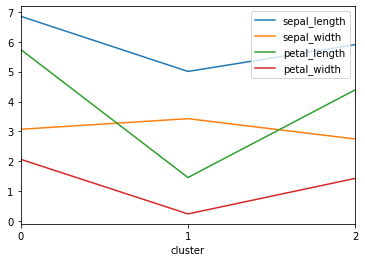

In [22]:
# 시각화
iris.groupby(['cluster']).mean().plot()
plt.xticks([0,1,2])

# (번외)군집화에서 중요한 k값을 찾는법

# k값 찾기

elbow 기법은 k-means clustering에서 중요한 k값에 따라 성능이 얼만큼 변하는지 확인하는 기법이다. 기울기가 급격하게 줄어드는 곳이 최적의 k값일 확률이 높다.

In [23]:
# elbow 기법
def elbow(x):
    k = []
    sse = []
    
    for i in range(1, 11):
        model = KMeans(n_clusters = i)
        model.fit(x)
        sse.append(model.inertia_)
        k.append(i)
        
    plt.plot(k, sse, marker='o')
    plt.xlabel("number of cluster")
    plt.ylabel("SSE")
    
    plt.show()   

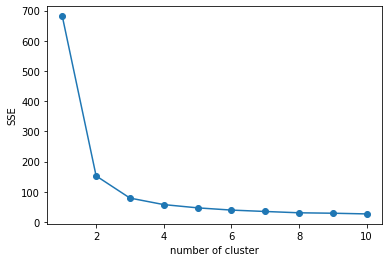

In [24]:
elbow(X_data)

# 계층적 군집

유클리드 거리를 이용한 군집 <br>
dendrogram : 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림

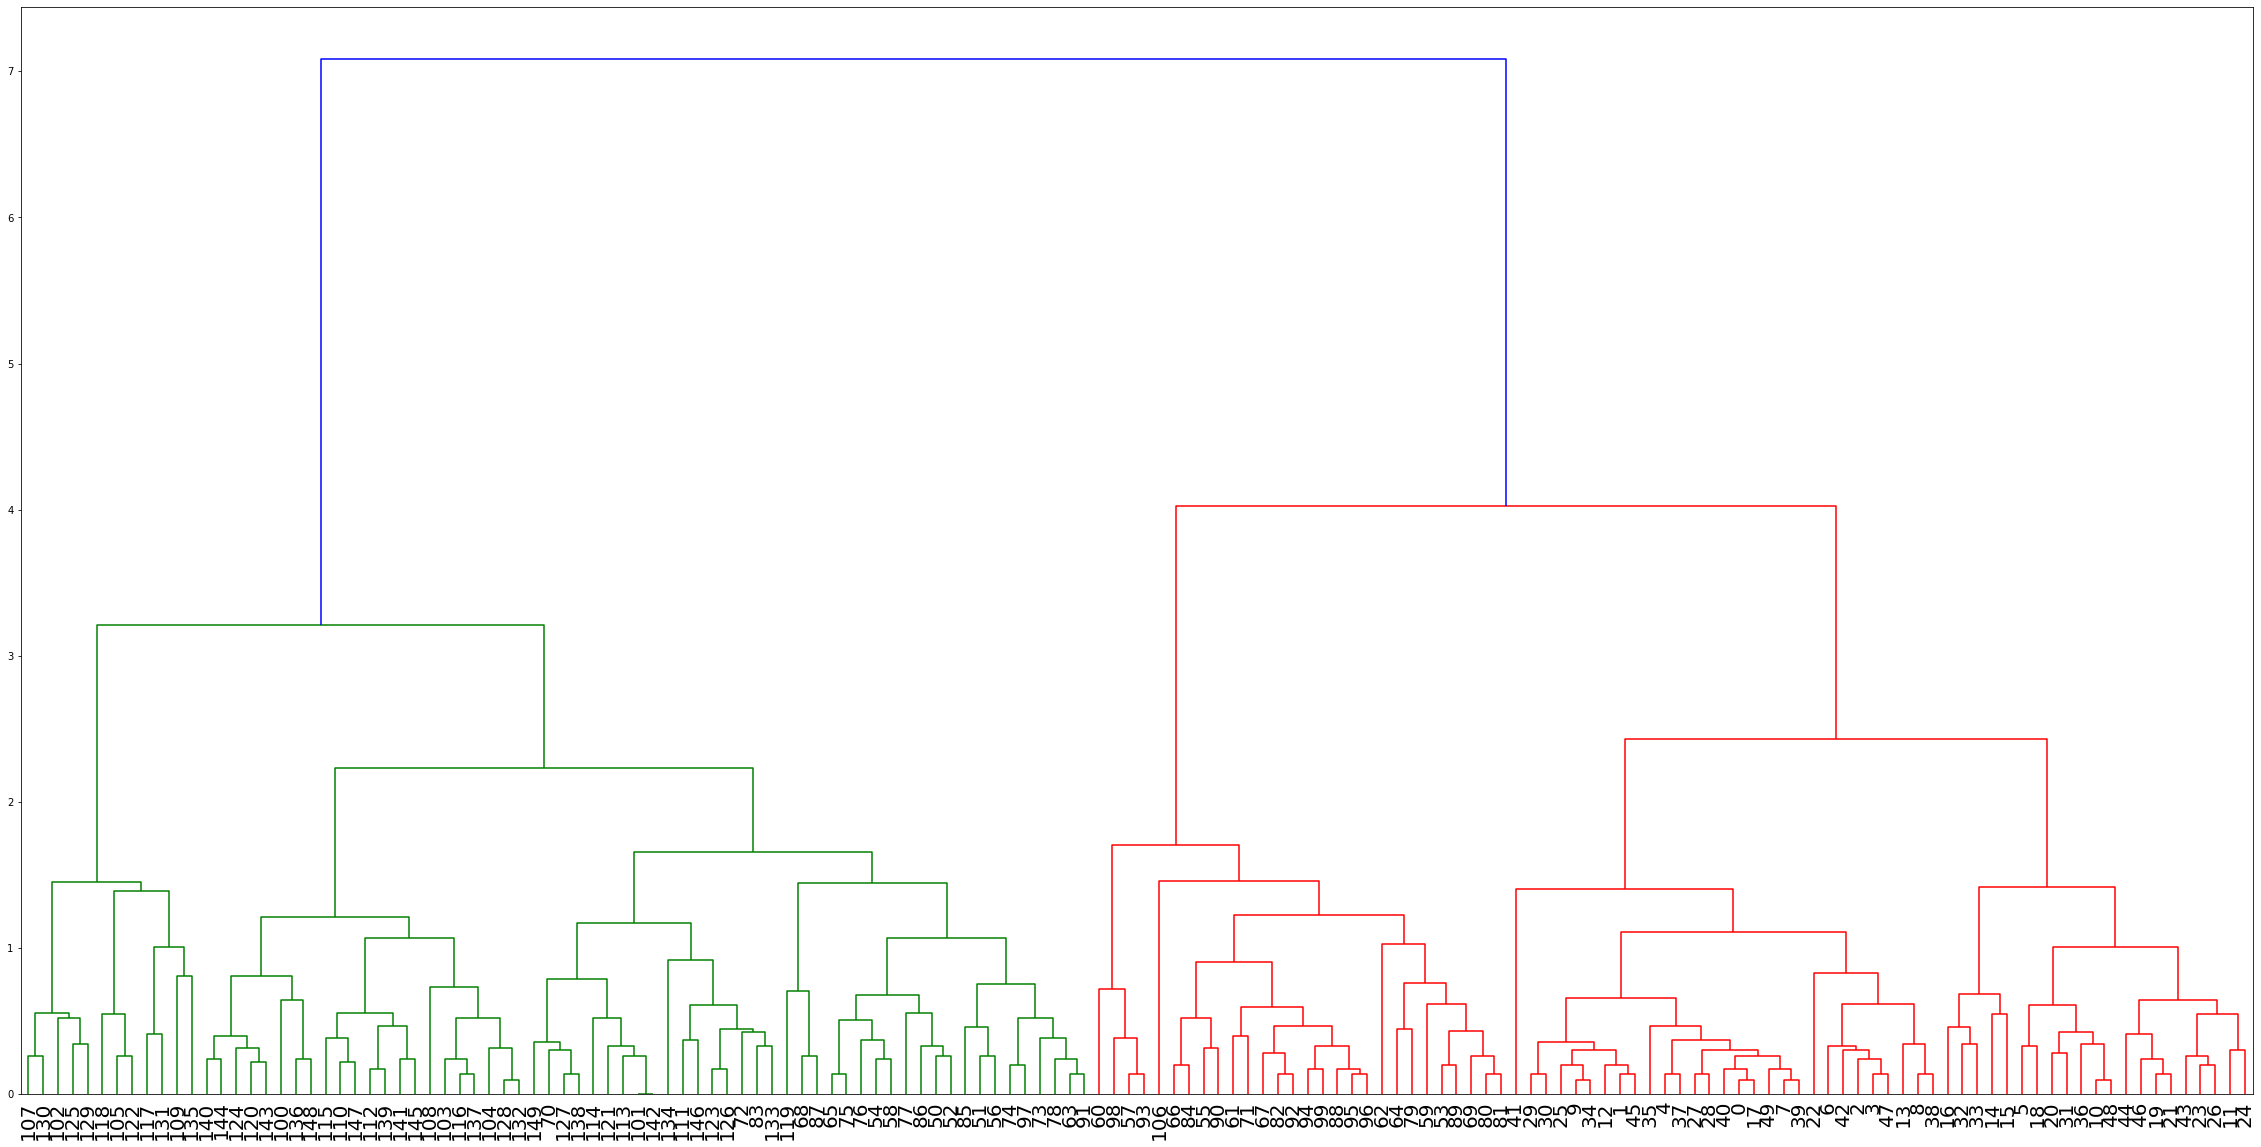

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 'complete' : 먼 거리
# 'single' : 짧은 거리
# 'average' : 평균 거리

mergings = linkage(X_data,method='complete')

plt.figure(figsize=(40,20))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [27]:
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings, 4, criterion='maxclust'))
predict.columns=['predict']

predict['predict'].value_counts()

2    60
4    50
3    28
1    12
Name: predict, dtype: int64